Introduction <br/>
Predicting the crime rate for the future 1 year and 2 year using loaded Chicago Data <br/>
DataSet link: [Kaggle Download](https://www.kaggle.com/datasets/currie32/crimes-in-chicago)

Pipeline
* Load the data <br/>
* concat the different data <br/>
* visualize concat data <br/>
* vis. null elements using heatmap <br/>
* Dropping unwanted information <br/>
* Changing Date Time format <br/>
* Assigning Date as index <br/>
* visualize the Crime rate against Type of Crime <br/>
* visualize the Crime rate against Crime Location <br/>
* vis. Crime rate occured per year <br/>
* vis. Crime rate occured per month <br/>
* vis. Crime rate occured per quarter <br/>
* Prepare the data so that facebook prohet can be applied <br/>
* Rename the data columns to ds and y <br/>
* apply fit method <br/>
* predict for a year <br/>
* vis. future  <br/>
* vis. trend and seasonality for the year <br/>
* predict for 2 year <br/> 
* vis. future <br/>
* vis. trend and seasonality for 2 years <br/>

Import Data

In [ ]:
#install Facebook Prophet library
!python -m pip install prophet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [49]:
#loading the data
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', encoding='utf-8', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',encoding='utf-8', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',encoding='utf-8', error_bad_lines=False)

C:\Users\H504133\AppData\Local\Temp\ipykernel_17520\2050815876.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', encoding='utf-8', error_bad_lines=False)
b'Skipping line 533719: expected 23 fields, saw 24\n'
C:\Users\H504133\AppData\Local\Temp\ipykernel_17520\2050815876.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',encoding='utf-8', error_bad_lines=False)
b'Skipping line 1149094: expected 23 fields, saw 41\n'
C:\Users\H504133\AppData\Local\Temp\ipykernel_17520\2050815876.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.

In [3]:
#checking shape
chicago_df_1.shape,chicago_df_2.shape,chicago_df_3.shape

((1872343, 23), (2688710, 23), (1456714, 23))

In [50]:
#cocatenating all 3 dattaframes
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [5]:
#checking shape of concatenated dataframe
chicago_df.shape

(6017767, 23)

In [6]:
#Exploitatry Data Analysis
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


<AxesSubplot:>

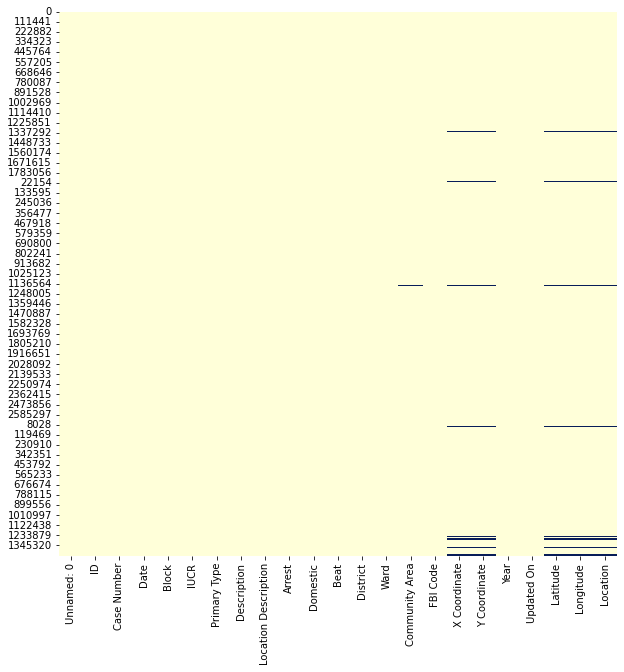

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar = False, cmap= 'YlGnBu')

In [10]:
chicago_df.shape

(6017767, 23)

Exploration DATA

In [11]:
chicago_df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


<AxesSubplot:>

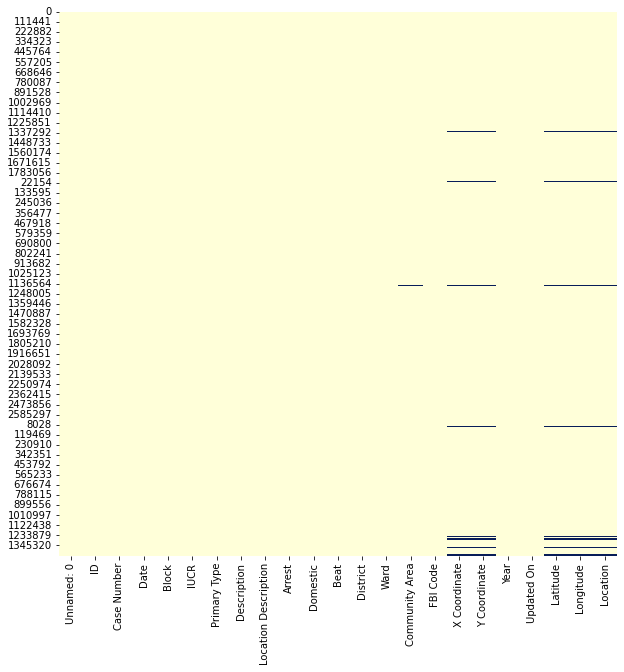

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [ ]:
chicago_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [51]:
#Dropping unwanted columns (out of scope data)
chicago_df.drop(['Unnamed: 0','ID','Case Number','IUCR','Beat','District','Ward','Community Area','FBI Code','X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],inplace=True,axis = 1)

In [21]:
chicago_df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [52]:
#arranging date time format
chicago_df.Date = pd.to_datetime(chicago_df.Date, format= '%m/%d/%Y %I:%M:%S %p')

In [23]:
chicago_df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [54]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [33]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [34]:
#Top 15 cases
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [35]:
#top 15 cases indices
order_data  = chicago_df['Primary Type'].value_counts().iloc[:15].index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

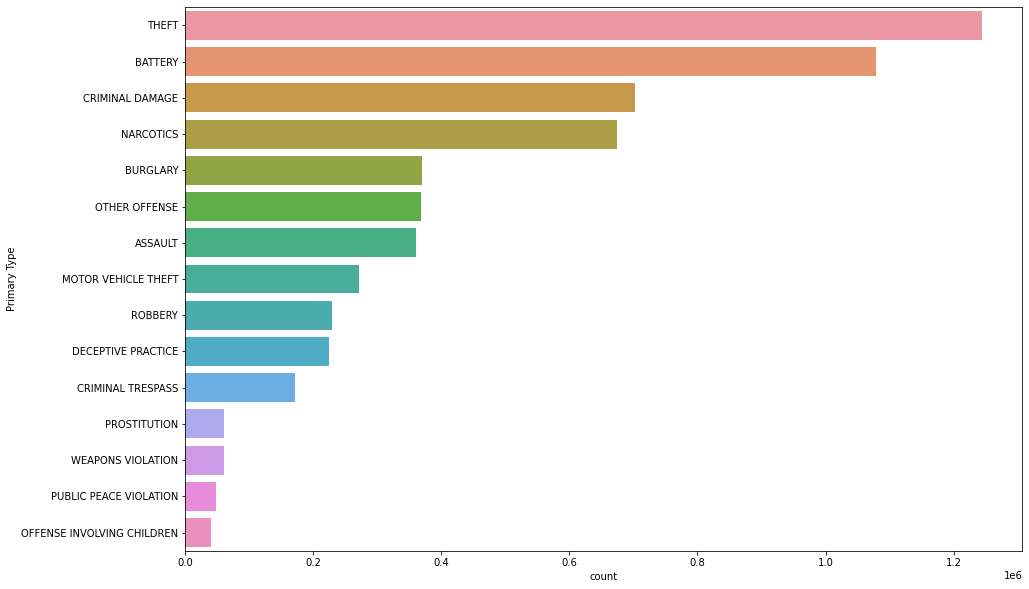

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

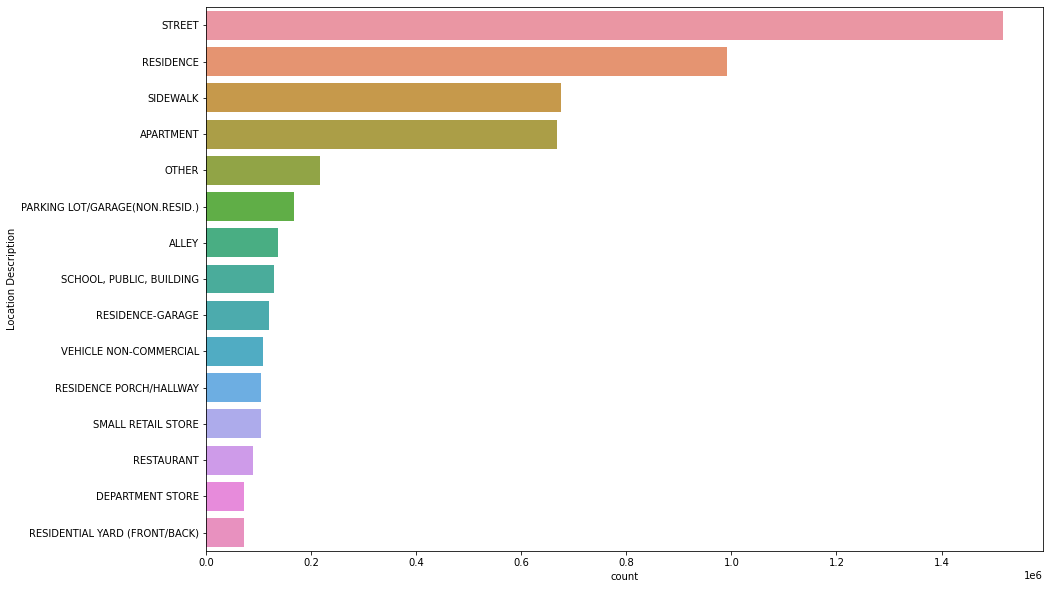

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Location Description', data = chicago_df , order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [55]:
#how many crimes occured within each year
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of crimes')

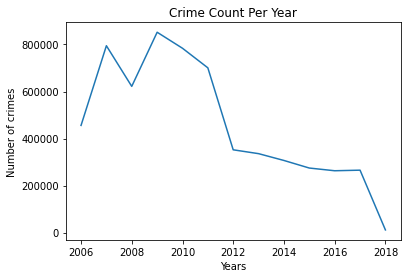

In [39]:
#ploting frequency of occurence of Crimes for Year
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of crimes')

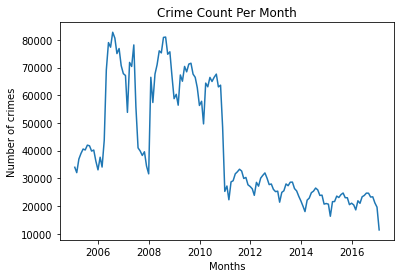

In [44]:
#ploting frequency of occurence for month
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of crimes')

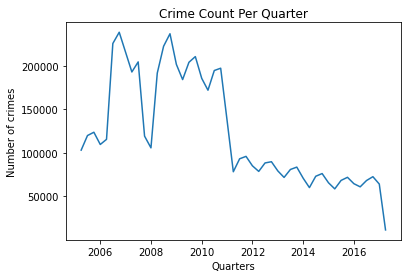

In [46]:
#ploting frequency of occurence for Quarter
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of crimes')

Preparing DATA

In [56]:
#resetting the index
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [57]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [60]:
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet.head()

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


In [61]:
#renaming the clumns to apply facebook prophet
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date' :'ds' , 'Crime Count':'y'})
chicago_prophet_df_final.head()

Make Predictions

In [62]:
#fitting the final data
m = Prophet()
m.fit(chicago_prophet_df_final)

14:21:58 - cmdstanpy - INFO - Chain [1] start processing
14:22:00 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
#predicting for a year
future = m.make_future_dataframe(periods= 365)
forecast = m.predict(future)

In [64]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60453.509000,37849.134539,72155.306716,60453.509000,60453.509000,-4752.888132,-4752.888132,-4752.888132,-4752.888132,-4752.888132,-4752.888132,0.0,0.0,0.0,55700.620868
1,2005-02-28,60322.297972,35273.937711,68067.540553,60322.297972,60322.297972,-9448.487576,-9448.487576,-9448.487576,-9448.487576,-9448.487576,-9448.487576,0.0,0.0,0.0,50873.810396
2,2005-03-31,60177.028619,42939.427154,75613.599822,60177.028619,60177.028619,-1231.182441,-1231.182441,-1231.182441,-1231.182441,-1231.182441,-1231.182441,0.0,0.0,0.0,58945.846178
3,2005-04-30,60036.445375,43920.734160,78220.450467,60036.445375,60036.445375,1122.814382,1122.814382,1122.814382,1122.814382,1122.814382,1122.814382,0.0,0.0,0.0,61159.259757
4,2005-05-31,59891.176023,46916.663253,82551.843567,59891.176023,59891.176023,5395.261915,5395.261915,5395.261915,5395.261915,5395.261915,5395.261915,0.0,0.0,0.0,65286.437938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,9886.773279,-9850.225959,22181.110837,9741.833329,10046.427602,-4260.770662,-4260.770662,-4260.770662,-4260.770662,-4260.770662,-4260.770662,0.0,0.0,0.0,5626.002617
506,2018-01-28,9873.525930,-11602.338529,21697.604194,9727.998584,10034.476711,-4360.232112,-4360.232112,-4360.232112,-4360.232112,-4360.232112,-4360.232112,0.0,0.0,0.0,5513.293818
507,2018-01-29,9860.278581,-10851.774769,21959.538890,9714.163839,10022.483852,-4469.417772,-4469.417772,-4469.417772,-4469.417772,-4469.417772,-4469.417772,0.0,0.0,0.0,5390.860809
508,2018-01-30,9847.031232,-10998.383160,22756.324963,9700.329095,10010.351461,-4588.731852,-4588.731852,-4588.731852,-4588.731852,-4588.731852,-4588.731852,0.0,0.0,0.0,5258.299380


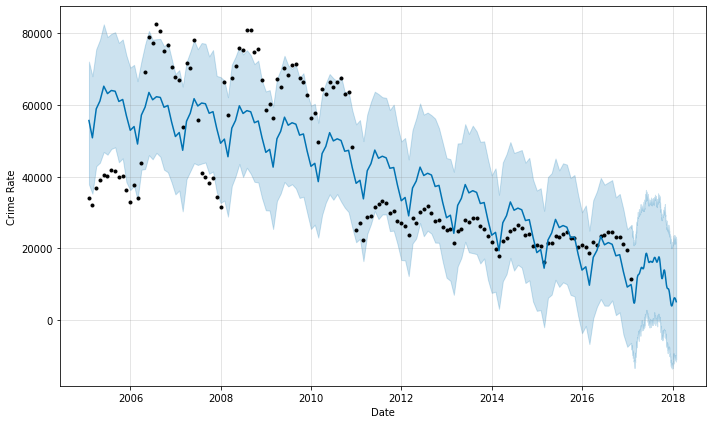

In [66]:
#plotting the the data with future
figure = m.plot(forecast, xlabel = 'Date' , ylabel='Crime Rate')

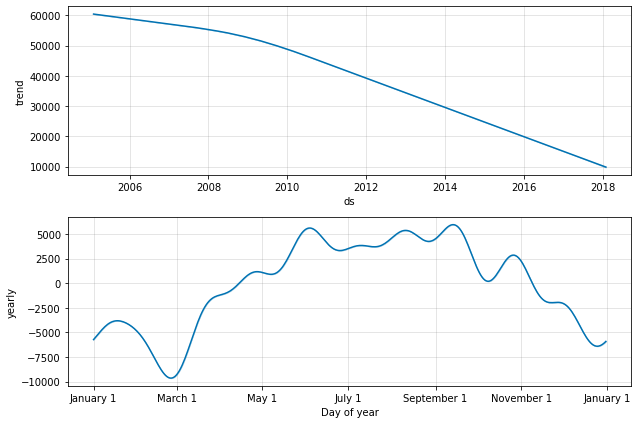

In [67]:
#checking the seasonality
figure = m.plot_components(forecast)

In [72]:
#predictiong for next 2 years
#predicting 
future_2 = m.make_future_dataframe(periods= 720)
forecast_2 = m.predict(future_2)

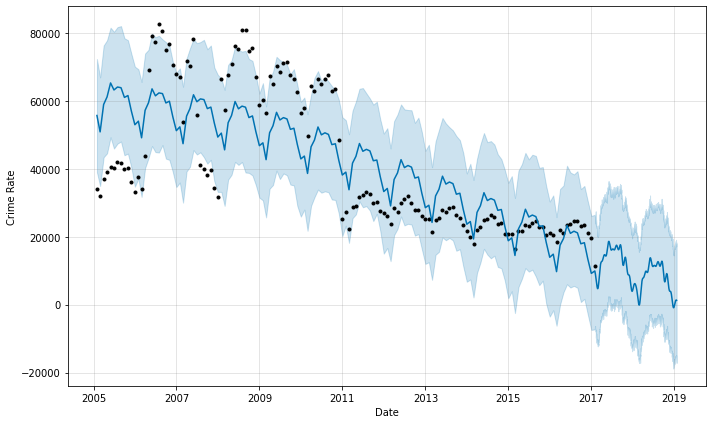

In [73]:
figure = m.plot(forecast_2, xlabel = 'Date' , ylabel='Crime Rate')

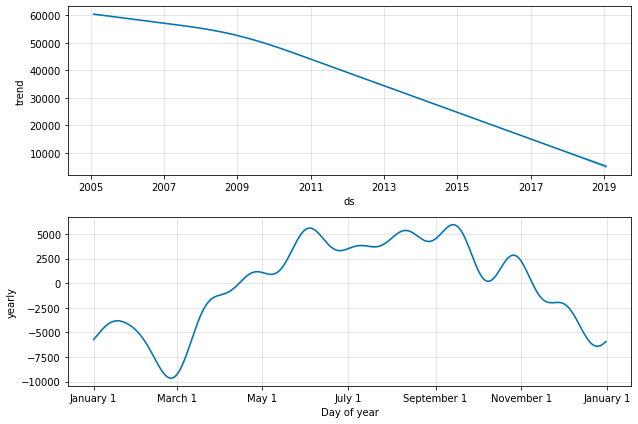

In [74]:
figure = m.plot_components(forecast_2)